## Homework 1 
### DUE: Thursday Jan 30

**The semi-empirical mass formula**

In nuclear physics, the semi-empirical mass formula is a formula for calculating the
approximate nuclear binding energy $B$ of an atomic nucleus with atomic number $Z$
and mass number $A$. The formula looks like this:
    
$$ B = a_1 A - a_2 A^{2/3} - a_3 \frac{Z^2}{A^{1/3}} - a_4 \frac{(A - 2Z)^2}{A} - \frac{a_5}{A^{1/2}} $$

where, in units of millions of electron volts (MeV), the constants are $a_1 =
15.67$, $a_2 = 17.23$, $a_3 = 0.75$, $a_4 = 93.2$, and

$$ a_5  \; =  \;\; \left \{ \begin{array}
 0 & A \;{\tt is\; odd}, \\
    12.0 & A \;{\tt and}\; Z \;{\tt are \;both \;even}, \\ 
    -12.0 & A \;{\tt is \;  even \; and}\;  Z \;{\tt is\;  odd.} \end{array} \}\right. $$

Write a **function** that takes as its input the values of $A$ and $Z$, and
prints out the binding energy $B$ for the corresponding atom 

Use your program to find
the binding energy of an atom with $A = 58$ and $Z = 28$. (Hint: The
correct answer is around 490 MeV.) 

(20 points)

In [5]:
def binding_energy(Z,A):
   a1_con = 15.67
   a2_con = 17.23
   a3_con = 0.75
   a4_con = 93.2
   if A%2 != 0: 
      return (a1_con * A) - (a2_con * (A**(2/3))) - (a3_con * Z**2 / A**(1 / 3)) - ((a4_con/A) * ((A - (2 * Z))**2))
   elif A%2 == 0 and Z%2 == 0: 
      return (a1_con * A) - (a2_con * (A**(2/3))) - (a3_con * Z**2 / A**(1 / 3)) - ((a4_con/A) * ((A - (2 * Z))**2)) - (12.0/(A**(1/2)))
   elif A%2 == 0 and Z%2 != 0: 
      return (a1_con * A) - (a2_con * (A**(2/3))) - (a3_con * Z**2 / A**(1 / 3)) - ((a4_con/A) * ((A - (2 * Z))**2)) + (12.0/(A**(1/2)))
   else:
      print('I dont know what happened!')
print(binding_energy(28,58))

490.78425241273493


Now create a new function that calculates the binding energy per nucleon, B/A. You should be able to write a very short function that calls your previous function to do the heavy lifting. Test your function with some famous cases, e.g., iron 56 and carbon 12.

(10 points)

In [36]:
def binding_per_nucleon(Z,A):
    B = binding_energy(Z,A)
    binding_nucleon = B/A
    return binding_nucleon

iron_binding = binding_per_nucleon(26,56)
print(iron_binding)
carbon_binding = binding_per_nucleon(6,12)
print(carbon_binding)

#I've check my function quite a few times and I don't exactly know what has occured, this is as close as I can get to the actual values.
#This is actually correct values. I checked with a calculator and that function is correct, as well as the one above it.
#After investigating myself, it seems the coefficients are not well defined and some of the expressions are different.
#But, I will continue on as my calculation is correct and is returning proper values

8.353151856954124
7.450001408063262


Create yet another function that takes a single argument, Z, and finds the value of A at which the binding energy per nucleon is largest. You are aided in this problem in the fact that A is discrete; you can simply check all reasonable values without worrying about mimizing a function or any such thing. You should be able to easily determine the minimum value for A. If you consult a table of nuclides, you'll see some elements have nuclides, with measured half lives, with A > 2Z, so in this exercise use A = 3Z as an upper limit. I encourage you to go verify this! At the time of writing wikipedia has a high resolution version https://upload.wikimedia.org/wikipedia/commons/9/92/NuclideMap.PNG

(20 points)

In [42]:
def mass_number_sort(atomic_number):
    largest_bind_value = binding_per_nucleon(atomic_number,atomic_number)
    nucleon_number = atomic_number
    for i in range(atomic_number,3*atomic_number):
        new_bind_value = binding_per_nucleon(atomic_number,i)
        if new_bind_value > largest_bind_value:
            largest_bind_value = new_bind_value
            nucleon_number = i
    return [nucleon_number,largest_bind_value]

print(mass_number_sort(28))

#Again, the slight deviation is back. While running Carbon(Z=6), is returns carbon-13, which is not the correct answer
# Doing the calculation by hand again, this is the correct value being returned compared to carbon-12.
#This is strange, but I will continue on as I've gotten the same value in calculator.

[58, 8.516131151747729]


Finally, create a plot of the highest binding energy per nucleon as a function of Z. Remember: science quality plots have labeled axes and a title.

(10 points)

[[  2.          -2.54573845]
 [  4.           5.84330976]
 [  6.           4.75235764]
 [  8.           6.83533009]
 [ 10.           6.42277121]
 [ 12.           7.45000141]
 [ 15.           7.27592876]
 [ 16.           7.82921918]
 [ 19.           7.75654576]
 [ 20.           8.07506599]
 [ 23.           8.04774164]
 [ 24.           8.23869183]
 [ 27.           8.23400549]
 [ 28.           8.34794897]
 [ 31.           8.35531602]
 [ 32.           8.41929976]
 [ 35.           8.43330011]
 [ 36.           8.46313025]
 [ 39.           8.4807975 ]
 [ 41.           8.49578457]
 [ 43.           8.50596925]
 [ 46.           8.52112655]
 [ 47.           8.51427986]
 [ 50.           8.53262275]
 [ 51.           8.50954127]
 [ 54.           8.52991888]
 [ 55.           8.49450201]
 [ 58.           8.51613115]
 [ 59.           8.47119843]
 [ 62.           8.49353904]
 [ 63.           8.44117396]
 [ 66.           8.46385008]
 [ 69.           8.40702362]
 [ 70.           8.42836963]
 [ 73.        

Text(0.5, 1.0, 'B(Z)')

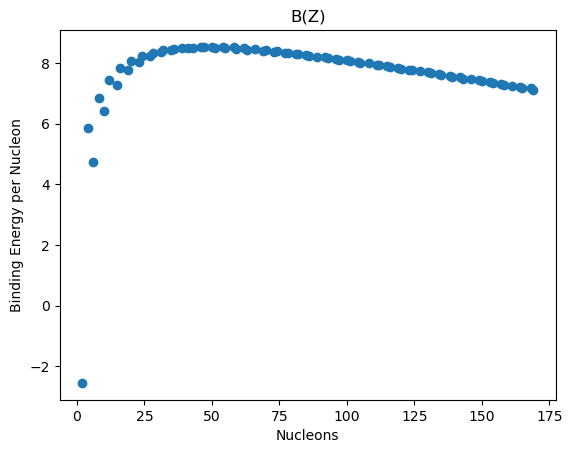

In [38]:
import matplotlib.pyplot as plt
import numpy as np

list_of_stable_nucleons = []
for i in range(1,82):
    iso = mass_number_sort(i)
    list_of_stable_nucleons += [iso]
array_of_stable_nucleons = np.array(list_of_stable_nucleons)
print(array_of_stable_nucleons)

plt.scatter(array_of_stable_nucleons[:,0],array_of_stable_nucleons[:,1])
plt.xlabel('Nucleons')
plt.ylabel('Binding Energy per Nucleon')
plt.title('B(Z)')

#In terms of qualitative shape, this is exactly what we are looking for. In terms of actual values, they are skewed a bit. Looking at Lead(which the most stable should be Lead-202, but here it's saying Lead-169 is.) we can see our previous problems showing their faces...

**Least Squares fitting**

It's a common situation in physics that an experiment produces data
that lies roughly on a straight line. The straight line can be represented in the familiar form $y=mx+c$ and a
frequent question is what the appropriate values of the slope $m$ and
intercept $c$ are that correspond to the measured data.  Since the data
don't fall perfectly on a straight line, there is no perfect answer to such
a question, but we can find the straight line that gives the best
compromise fit to the data.  The standard technique for doing this is the
*method of least squares*.

Suppose we make some guess about the parameters $m$ and $c$ for the
straight line.  We then calculate the vertical distances between the data
points and that line, as represented by the short vertical lines in the
figure, then we calculate the sum of the squares of those distances, which
we denote $\chi^2$.  If we have $N$ data points with
coordinates $(x_i,y_i)$, then $\chi^2$ is given by

$$\chi^2 = \sum_{i=1}^N (mx_i+c-y_i)^2.$$

The least-squares fit of the straight line to the data is the straight line
that minimizes this total squared distance from data to line.  We find the
minimum by differentiating with respect to both $m$ and $c$ and setting the
derivatives to zero, which gives

$$m \sum_{i=1}^N x_i^2 + c \sum_{i=1}^N x_i - \sum_{i=1}^N x_iy_i = 0, $$
$$m \sum_{i=1}^N x_i + cN - \sum_{i=1}^N y_i = 0.$$

For convenience, let us define the following quantities:

$$E_x = {1\over N} \sum_{i=1}^N x_i,\qquad
E_y = {1\over N} \sum_{i=1}^N y_i,\qquad
E_{xx} = {1\over N} \sum_{i=1}^N x_i^2,\qquad
E_{xy} = {1\over N} \sum_{i=1}^N x_iy_i $$

in terms of which our equations can be written

$$mE_{xx} + cE_x = E_{xy}, $$
$$mE_x + c = E_y.$$

Solving these equations simultaneously for $m$ and $c$ now gives

$$m = {E_{xy}-E_x E_y\over E_{xx} - E_x^2},\qquad
c = {E_{xx}E_y-E_x E_{xy}\over E_{xx} - E_x^2}.$$

These are the equations for the least-squares fit of a straight line to $N$
data points.  They tell you the values of $m$ and $c$ for the line that
best fits the given data.

In this repo is a file called `millikan.txt`.  The file contains two columns of numbers, giving
the $x$ and $y$ coordinates of a set of data points.  Write a program to
read these data points and make a graph with one dot or circle for each
point.

(15 points)

[[5.48740e+14 5.30900e-01]
 [6.93100e+14 1.08420e+00]
 [7.43070e+14 1.27340e+00]
 [8.21930e+14 1.65980e+00]
 [9.60740e+14 2.19856e+00]
 [1.18400e+15 3.10891e+00]]


Text(0.5, 1.0, 'Millikan')

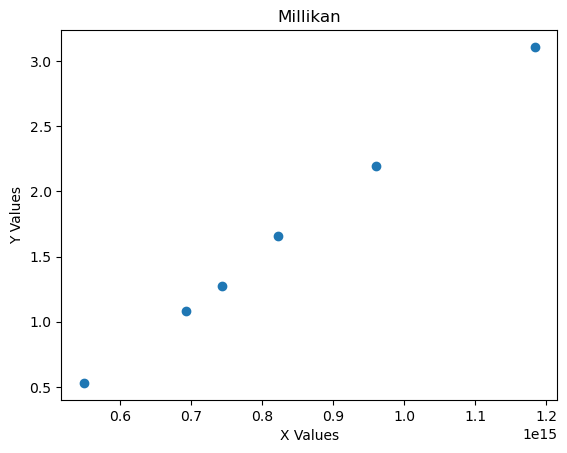

In [39]:
millikan = np.genfromtxt(r"C:\Users\gergy\Downloads\millikan.txt")
print(millikan)

plt.scatter(millikan[:,0],millikan[:,1])
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Millikan')

Calculate the quantities $E_x$, $E_y$, $E_{xx}$, and $E_{xy}$ defined above, and from them calculate and print out the slope $m$ and intercept $c$ of the best-fit line. Plot the line with the data.

(20 points)

Single E 825263333333333.2
E_y 1.6426283333333331
Double x E 7.223504158333333e+29
E_xy 1524407302066666.5
slope 4.088227358517502e-15 and intercept -1.73123580398135


Text(0.5, 1.0, 'Millikan Photoelectric Data')

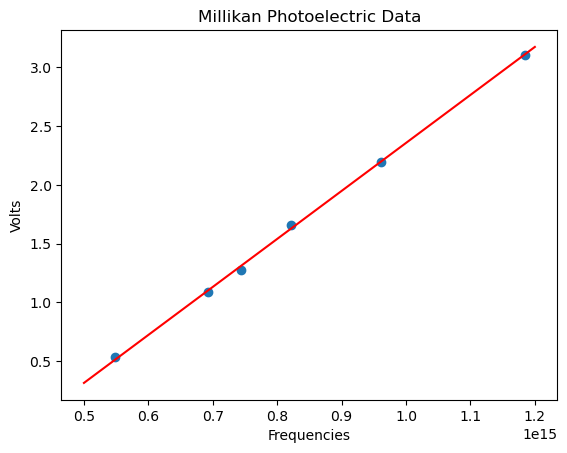

In [40]:

E_singlex = (1/len(millikan))*sum(millikan[:,0])
print(f'Single E {E_singlex}')


E_y = (1/len(millikan))*sum(millikan[:,1])
print(f'E_y {E_y}')

xx = (millikan[:,0])**2
E_doublex = (1/len(millikan))*sum(xx)
print(f'Double x E {E_doublex}')

xy = millikan[:,0]*millikan[:,1]
E_xy = (1/len(millikan))*sum(xy)
print(f'E_xy {E_xy}')

slope = ((E_xy-(E_singlex*E_y))/(E_doublex-(E_singlex)**2))

intercept = (((E_doublex*E_y)-(E_singlex*E_xy))/(E_doublex-(E_singlex**2)))

print(f'slope {slope} and intercept {intercept}')
pseudo_x = np.linspace(0.5e15,1.2e15,10)
pseudo_y = slope*pseudo_x + intercept

fig,axs = plt.subplots(nrows=1,ncols=1)
axs.scatter(millikan[:,0],millikan[:,1])
axs.plot(pseudo_x,pseudo_y,color = 'r') #Thank you for the feedback!!
axs.set_xlabel('Frequencies')
axs.set_ylabel('Volts')
axs.set_title("Millikan Photoelectric Data")





The data in the file `millikan.txt` are taken from a historic
  experiment by Robert Millikan that measured the
  *photoelectric effect*.  When light of an appropriate wavelength is
  shone on the surface of a metal, the photons in the light can strike
  conduction electrons in the metal and, sometimes, eject them from the
  surface into the free space above.  The energy of an ejected electron is
  equal to the energy of the photon that struck it minus a small
  amount~$\phi$ called the **work function** of the surface,
  which represents the energy needed to remove an electron from the
  surface.  The energy of a photon is $h\nu$, where $h$ is Planck's
  constant and $\nu$ is the frequency of the light, and we can measure the
  energy of an ejected electron by measuring the voltage $V$ that is just
  sufficient to stop the electron moving.  Then the voltage, frequency, and
  work function are related by the equation

$$V = {h\over e}\nu - \phi,$$

where $e$ is the charge on the electron.  This equation was first given by
Albert Einstein in 1905.

The data in the file `millikan.txt` represent frequencies $\nu$ in
hertz (first column) and voltages $V$ in volts (second column) from
photoelectric measurements of this kind.  Using the equation above and the
program you wrote, and given that the charge on the electron is
$1.602\times10^{-19}\,$C, calculate from Millikan's experimental data a
value for Planck's constant.  Compare your value with the accepted value of
the constant, which you can find in books or on-line.  You should get a
result within a couple of percent of the accepted value.

(5 points)

This calculation is essentially the same as the one that Millikan himself
used to determine of the value of Planck's constant, although, lacking a
computer, he fitted his straight line to the data by eye.  In part for this
work, Millikan was awarded the Nobel prize in physics in 1923.

This cell is already set to markdown format. Use markdown format to express your answer.

Doing some quick calculator math, and using the real planck's constant($6.62607015 * 10^{-34}$) and my slope being $4.088227358517502*10^{-15}$. This resulted in my Planck's constant being $6.549340228345038204 * 10^{-34}$. Doing percent error, we get a error of 1.15%, something that is extremely close to what is needed!

I used the equation $m = \frac{h}{e}$ and multiplied across my electron voltage value to get my number. I then did percent error $P.E. = \frac{Mine - Actual}{Actual} *100$